<a href="https://colab.research.google.com/github/urness/CS167Fall22Code/blob/main/Day23NotesCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
import pandas
drive.mount('/content/drive')

## Enable GPUs
Go to 'Edit' and then 'Notebook Settings'. In the 'Hardware Accelerator' dropdown menu, select 'GPU'. This means that Colab will run on a GPU from Google rather than a CPU which will accelerate our training.

In [ ]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

In [ ]:
import keras
import tensorflow as tf
print ("TensorFlow version: " + tf.__version__)
print ("Keras version: " + keras.__version__)

In [ ]:
#ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# import the libraries
import keras
import sys
from matplotlib import pyplot
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.preprocessing.image import ImageDataGenerator
import sys

Run the following for the full data set
Warning: the first epoch may take a while; but future epochs tend to go quickly

In [ ]:
# dimensions of our images. We take the images an convert them to 64x64 pixel arrays. This can be changed/tuned
img_width = 64
img_height = 64

#the directories where our train and test data is
train_data_dir = '/content/drive/MyDrive/CS167Fall22/Datasets/animals/train' #922 images
test_data_dir = '/content/drive/MyDrive/CS167Fall22/Datasets/animals/test'   #91 images

#we will feed the training images to the neural network
#in batches of 32 images at a time so we don't have 
#to load the entire data set into memory
batch_size = 32


# Load the data
If you get a 'File not found' error here and you're sure your path is correct, make sure you unzipped the file. 

You may need to use a plugin if you want to unzip on Drive. Instead you can download it to your local machine, unzip it on your local machine and then upload to Drive. Uploading/upzipping on Drive may take a while.

This code needs to be adjusted to work with categorical classification

###Documentation hint for exercise below:
Tensorflow API for [flow_from_directory](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator#flow_from_directory)

In [ ]:
# used to rescale the pixel values from [0, 255] to between 0 and 1
datagen = ImageDataGenerator(rescale=1.0/255.0)

#These will look for our training and testing data
#in their respective directory, and it will figure out
#the class of each example based on the subfolder it is in
train_data = datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode='binary') ### may need to be changed

test_data = datagen.flow_from_directory(
        test_data_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode='binary') ### may need to be changed

###Documentation Hint for exercise below:
Keras [Layer activation functions](https://keras.io/api/layers/activations/)


In [ ]:
#setting up a CNN model here....
model = Sequential()
model.add(Conv2D(32, (3, 3), activation = 'relu', input_shape=(img_width, img_height, 3)))
model.add(Flatten()) #flatten the convolutional layer so it can go into a fully-connected layer
model.add(Dense(32)) #fully-connected layer
model.add(Dense(1,activation='sigmoid')) ### need to change this 

# need to compile the model before you can use it
model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy']) 

In [ ]:
#This will actually train the model.
#You will want to change the epochs to something small enough to run on your computer.
#Maybe 3 to 10 if you do not have a GPU doing the work.
training_results = model.fit_generator(
        train_data, #training set
        steps_per_epoch = len(train_data), 
        epochs=5, #number of epochs 
        validation_data = test_data, #testing set
        validation_steps = len(test_data)
        )

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(training_results.history['accuracy'])
plt.plot(training_results.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Now, test an image in the testing *set*


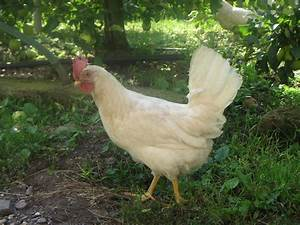

In [ ]:
# display the image
from IPython.display import Image
display(Image('/content/drive/MyDrive/CS167Spring22/datasets/animals/test/chicken/215.jpeg'))

In [ ]:
from keras.utils import load_img
from keras.utils import img_to_array
img = load_img("/content/drive/MyDrive/CS167Fall22/Datasets/animals/test/chicken/215.jpeg", target_size=(64, 64))

# convert to array
img = img_to_array(img)
# reshape into a single sample with 3 channels

img = img.reshape(1, 64, 64, 3)
img = img.astype('float32')
#convert image from [0,255] to [0,1]
img = datagen.standardize(img)

# predict the class
result = model.predict(img)
print(result)

In [ ]:
# get the list of possible classes from the directory
import os
vals = list(result[0])

classes = os.listdir("./drive/MyDrive/CS167Fall22/Datasets/animals/train/")
classes.sort()
max_index = vals.index(max(vals)) # what one is best?
print(classes[max_index])

